In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
def extract_numbers(dataset, metric):
    vals = [dataset[str(i)][metric] for i in range(12)]
    return np.array(vals)

In [3]:
with open("minecraft_probe_results/MinecraftNTP_gpt2_pt___eftext_msl768_ns1_nv1-64_mndt8_tbs32_ebs32_ntr65536_ntt16392_seed201_tl-1024_vl-500_nui-32_mnt-128_pt-lr_ptp--1.json") as f:
    probe32_data = json.load(f)

with open("minecraft_probe_results/MinecraftNTP_gpt2_pt___eftext_msl768_ns1_nv1-64_mndt8_tbs32_ebs32_ntr65536_ntt16392_seed201_tl-2048_vl-500_nui-64_mnt-256_pt-lr_ptp--1.json") as f:
    probe64_data = json.load(f)
    
with open("minecraft_probe_results/MinecraftNTP_gpt2_pt___eftext_msl768_ns1_nv1-64_mndt8_tbs32_ebs32_ntr65536_ntt16392_seed201_tl-2048_vl-500_nui-128_mnt-256_pt-lr_ptp--1.json") as f:
    probe128_data = json.load(f)

with open("minecraft_probe_results/MinecraftNTP_gpt2_pt___eftext_msl768_ns1_nv1-64_mndt8_tbs32_ebs32_ntr65536_ntt16392_seed201_tl-2048_vl-500_nui-256_mnt-256_pt-lr_ptp--1.json") as f:
    probe256_data = json.load(f)

In [4]:
# Some font size configurations
legend_fs = 18
title_fs = 20
axis_fs = 18
tick_fs = 18

<Figure size 640x480 with 0 Axes>

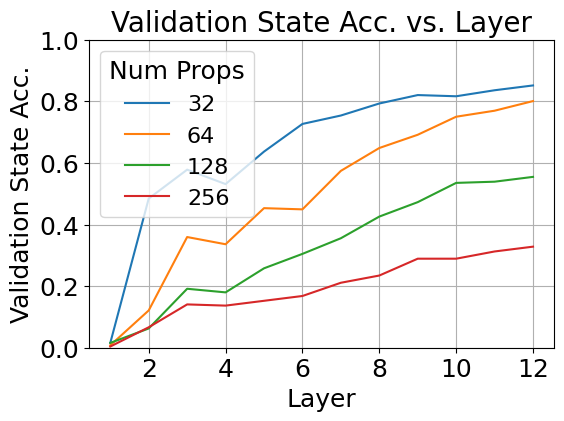

In [5]:
plt.clf()
fig = plt.figure(figsize=(6,4))

layers = np.arange(1,13)
plt.plot(layers, extract_numbers(probe32_data, "val_state_mean"), label="32")
plt.plot(layers, extract_numbers(probe64_data, "val_state_mean"), label="64")
plt.plot(layers, extract_numbers(probe128_data, "val_state_mean"), label="128")
plt.plot(layers, extract_numbers(probe256_data, "val_state_mean"), label="256")

plt.legend(title="Num Props", fontsize=legend_fs-2, title_fontsize=legend_fs, loc="upper left")
plt.xlabel("Layer", fontsize=axis_fs)
plt.ylabel("Validation State Acc.", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.ylim(0,1)
plt.title("Validation State Acc. vs. Layer", fontsize=title_fs)
plt.grid()
plt.savefig("minecraft_probe_results_final_new_val_state_mean.png", bbox_inches="tight", transparent=True)

<Figure size 640x480 with 0 Axes>

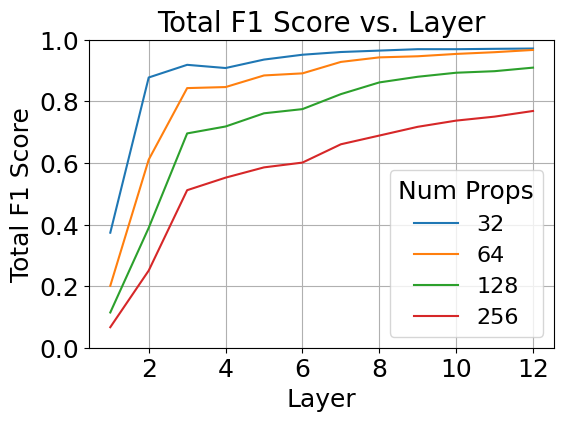

In [6]:
plt.clf()
fig = plt.figure(figsize=(6,4))

layers = np.arange(1,13)
plt.plot(layers, extract_numbers(probe32_data, "total_f1"), label="32")
plt.plot(layers, extract_numbers(probe64_data, "total_f1"), label="64")
plt.plot(layers, extract_numbers(probe128_data, "total_f1"), label="128")
plt.plot(layers, extract_numbers(probe256_data, "total_f1"), label="256")

plt.legend(title="Num Props", fontsize=legend_fs-2, title_fontsize=legend_fs, loc="lower right")
plt.xlabel("Layer", fontsize=axis_fs)
plt.ylabel("Total F1 Score", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.ylim(0,1)
plt.title("Total F1 Score vs. Layer", fontsize=title_fs)
plt.grid()
plt.savefig("minecraft_probe_results_final_new_total_f1.png", bbox_inches="tight", transparent=True)

In [7]:
with open("minecraft_probe_results_attack/MinecraftNTP_gpt2_pt___eftext_msl768_ns1_nv1-64_mndt8_tbs32_ebs32_ntr65536_ntt16392_seed201_tl-1024_vl-500_nui-32_mnt-128_pt-lr_ptp--1_attack.json") as f:
    attack_data = json.load(f)

with open("minecraft_probe_results_attack/MinecraftNTP_gpt2_pt___eftext_msl768_ns1_nv1-64_mndt8_tbs32_ebs32_ntr65536_ntt16392_seed201_tl-1024_vl-500_nui-32_mnt-128_pt-lr_ptp--1_original.json") as f:
    original_data = json.load(f)

<Figure size 640x480 with 0 Axes>

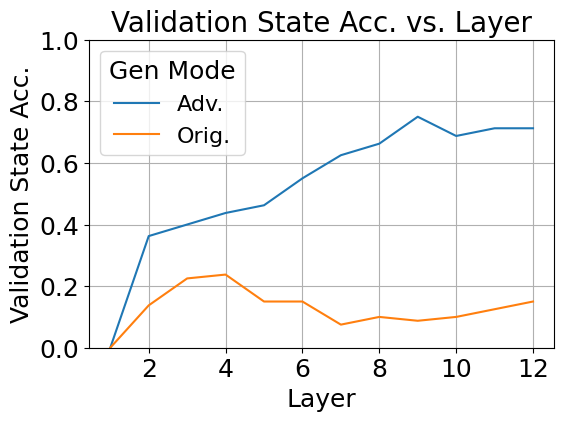

In [8]:
plt.clf()
fig = plt.figure(figsize=(6,4))

layers = np.arange(1,13)
plt.plot(layers, extract_numbers(original_data, "val_state_mean"), label="Adv.")
plt.plot(layers, extract_numbers(attack_data, "val_state_mean"), label="Orig.")
# plt.plot(layers, extract_numbers(attack_data, "val_state_mean"), label="64")
# plt.plot(layers, extract_numbers(attack_data, "val_state_mean"), label="128")
# plt.plot(layers, extract_numbers(attack_data, "val_state_mean"), label="256")

plt.legend(title="Gen Mode", fontsize=legend_fs-2, title_fontsize=legend_fs, loc="upper left")
plt.xlabel("Layer", fontsize=axis_fs)
plt.ylabel("Validation State Acc.", fontsize=axis_fs)
plt.yticks(fontsize=tick_fs)
plt.xticks(fontsize=tick_fs)
plt.ylim(0,1)
plt.title("Validation State Acc. vs. Layer", fontsize=title_fs)
plt.grid()
plt.savefig("minecraft_attack_results_nui-32.png", bbox_inches="tight", transparent=True)